In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
breast_cancer = pd.read_csv('breast-cancer.data',names=["Class", "age", "menopause",
                                                         "tumor-size","inv-nodes","node-caps",
                                                         "deg-malig","breast","breast-quad",
                                                         "irradiat"], 
                            header=None,dtype={'continent':'category'})

In [3]:
breast_cancer.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [4]:
breast_cancer.describe()

,deg-malig
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumor-size   285 non-null    object
 4   inv-nodes    285 non-null    object
 5   node-caps    285 non-null    object
 6   deg-malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [6]:
breast_cancer= breast_cancer[['Class', 'age', 'menopause','tumor-size', 'inv-nodes','node-caps',
                             'deg-malig','breast','breast-quad','irradiat']].apply(lambda x: x.astype('category').cat.codes)

<AxesSubplot:>

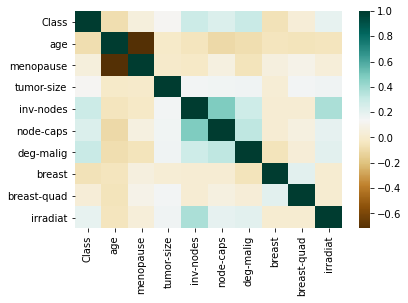

In [7]:
sns.heatmap(breast_cancer.corr(),cmap="BrBG",annot=False)

In [8]:
from sklearn.model_selection import train_test_split
X = breast_cancer.iloc[0:, 1:]
y = breast_cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=90)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [10]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [11]:
f1_score(y_test, result) 

0.631578947368421

In [12]:
clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)
result = clf_mn.predict(X_test)

In [13]:
f1_score(y_test, result)

0.509090909090909

In [14]:
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
result = clf_b.predict(X_test)

In [15]:
f1_score(y_test, result)

0.44897959183673464

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [17]:
dt.fit(X_train, y_train)
result = dt.predict(X_test)

In [148]:
f1_score(y_test, result)

0.3703703703703704